# 7 Investigating Customer Profiles

### This script contains the following points
#### 01 Import Libraries
#### 02 Import Data
#### 03 First Look at Data
#### 04 Investigate Customer Profiles
#### 05 Export Data

# 01 Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# Set a path

path = r'D:\Data'

In [3]:
# Import "ic_small"

ic_small = pd.read_pickle(os.path.join(path, 'ic_small.pkl'))

In [18]:
# Set a new path

new_path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Instacart Basket Analysis'

In [21]:
# Import "checked_departments"

deps = pd.read_csv(os.path.join(new_path, '02 Data', 'Prepared Data', 'checked_departments.csv'), index_col = False)

# 03 First Look at Data

In [5]:
# Shape of "ic_small"

ic_small.shape

(9286507, 28)

In [6]:
# First few rows of "ic_small"

ic_small.head()

,user_id,gender,state,age,n_dependants,fam_status,income,product_id,product_name,aisle_id,...,reordered,price_range_flag,busiest_day_flag,busiest_period_flag,max_order,loyalty_flag,spending_flag,frequency_flag,region,exclusion_flag
2,26711,Female,Missouri,48,3,married,165665,196,Soda,77,...,1,Mid range product,Regularly busy,Most orders,8,New customer,Low spender,Regular customer,midwest,keep
4,26711,Female,Missouri,48,3,married,165665,6184,Clementines,32,...,1,Low range product,Regularly busy,Most orders,8,New customer,Low spender,Regular customer,midwest,keep
7,26711,Female,Missouri,48,3,married,165665,6184,Clementines,32,...,1,Low range product,Regularly busy,Average orders,8,New customer,Low spender,Regular customer,midwest,keep
9,26711,Female,Missouri,48,3,married,165665,6184,Clementines,32,...,1,Low range product,Regularly busy,Most orders,8,New customer,Low spender,Regular customer,midwest,keep
22,33890,Female,New Mexico,36,0,single,59285,3298,Mozzarella String Cheese,21,...,0,Low range product,Regularly busy,Most orders,12,Regular customer,Low spender,Non-frequent customer,west,keep


In [7]:
# Data types of "ic_small"

ic_small.dtypes

user_id                     int32
gender                     object
state                      object
age                          int8
n_dependants                 int8
fam_status                 object
income                      int64
product_id                  int32
product_name               object
aisle_id                     int8
department_id                int8
prices                    float64
order_id                    int32
order_number                 int8
orders_day_of_week           int8
order_hour_of_day            int8
days_since_prior_order    float64
add_to_cart_order           int32
reordered                    int8
price_range_flag           object
busiest_day_flag           object
busiest_period_flag        object
max_order                    int8
loyalty_flag               object
spending_flag              object
frequency_flag             object
region                     object
exclusion_flag             object
dtype: object

# 04 Investigate Customer Profiles

In [6]:
# Create an "age_group" column that assigns an age group to a user ID

ic_small.loc[ic_small['age'] <=26, 'age_group'] = 'young adult'
ic_small.loc[(ic_small['age'] > 26) & (ic_small['age'] < 40), 'age_group'] = 'adult'
ic_small.loc[(ic_small['age'] >= 40) & (ic_small['age'] < 60), 'age_group'] = 'middle aged'
ic_small.loc[ic_small['age'] >= 60, 'age_group'] = 'senior'

In [20]:
# Check frequency of "age_group"

ic_small['age_group'].value_counts(dropna = False)

age_group
senior         3170299
middle aged    2915947
adult          1892906
young adult    1307355
Name: count, dtype: int64

In [15]:
# Create an "income_class" colum that assigns an income class to a user ID

ic_small.loc[ic_small['income'] <50000, 'income_class'] = 'low income'
ic_small.loc[(ic_small['income'] >= 50000) & (ic_small['income'] < 150000), 'income_class'] = 'middle income'
ic_small.loc[ic_small['income'] >= 150000, 'income_class'] = 'high income'

In [21]:
# Check frequency of "income_class"

ic_small['income_class'].value_counts(dropna = False)

income_class
middle income    7112062
high income      1167390
low income       1007055
Name: count, dtype: int64

In [16]:
# Create a "dependants_flag" to mark customers as "with dependants" or "whout dependants"

ic_small.loc[ic_small['n_dependants'] > 0, 'dependants_flag'] = 'with dependants'
ic_small.loc[ic_small['n_dependants'] == 0, 'dependants_flag'] = 'without dependants'

In [22]:
# Check frequency of "dependants_flag"

ic_small['dependants_flag'].value_counts(dropna = False)

dependants_flag
with dependants       6964211
without dependants    2322296
Name: count, dtype: int64

In [75]:
# Create a "customer_profile" column with age group and income class

ic_small['customer_profile'] = ic_small['age_group'] + ', ' + ic_small['income_class'] + ', ' + ic_small['dependants_flag']

In [76]:
ic_small['customer_profile'].value_counts(dropna = False)

customer_profile
senior, middle income, with dependants            1731791
middle aged, middle income, with dependants       1600460
adult, middle income, with dependants             1183576
young adult, middle income, with dependants        827046
senior, middle income, without dependants          575269
middle aged, middle income, without dependants     529713
senior, high income, with dependants               447941
adult, middle income, without dependants           397138
middle aged, high income, with dependants          397069
young adult, middle income, without dependants     267069
adult, low income, with dependants                 217407
senior, low income, with dependants                198002
middle aged, low income, with dependants           188178
senior, high income, without dependants            154155
young adult, low income, with dependants           149390
middle aged, high income, without dependants       137787
adult, low income, without dependants               766

### Which groups are most represented on this service?

In [80]:
cust_pr_counts = ic_small['customer_profile'].value_counts()

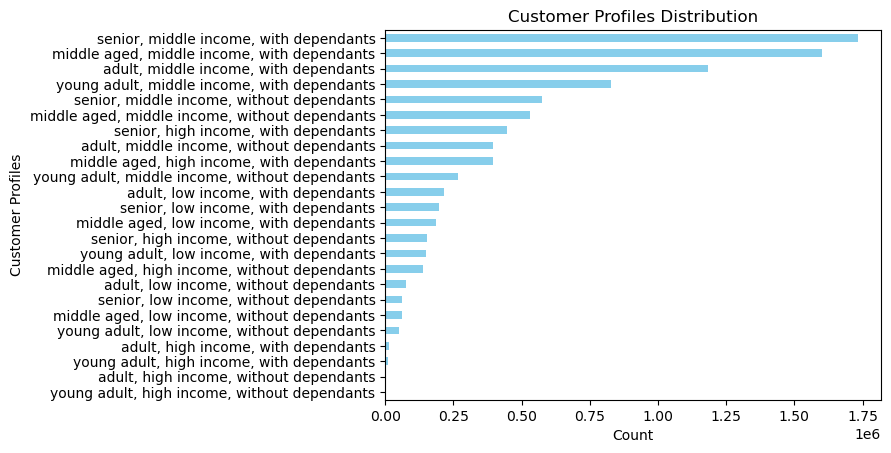

In [83]:
cust_pr = cust_pr_counts.plot.barh(color = 'skyblue', title = 'Customer Profiles Distribution', xlabel = 'Count', ylabel = 'Customer Profiles')
plt.gca().invert_yaxis()

### Which groups pay the most?

In [86]:
# Group by "customer_profile", then sum the prices

cust_pr_rev = ic_small.groupby('customer_profile')['prices'].sum().reset_index()

In [88]:
# Sort grouped data from highest to lowest

cust_pr_rev = cust_pr_rev.sort_values(by = 'prices', ascending = False)

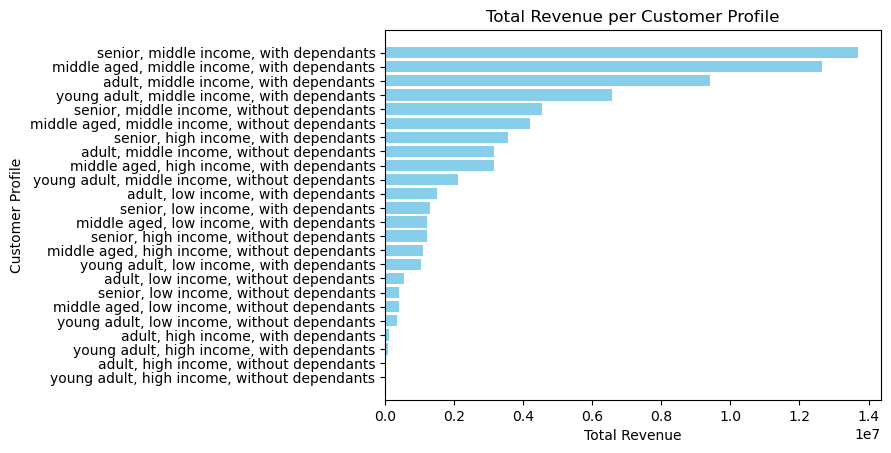

In [89]:
cust_pr_sales = plt.barh(cust_pr_rev['customer_profile'], cust_pr_rev['prices'], color = 'skyblue')
plt.title('Total Revenue per Customer Profile')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Profile')
plt.gca().invert_yaxis()

### Differences in ordering habits based on a customer's loyalty status

In [93]:
grouped_loyal = ic_small.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack(fill_value = 0)

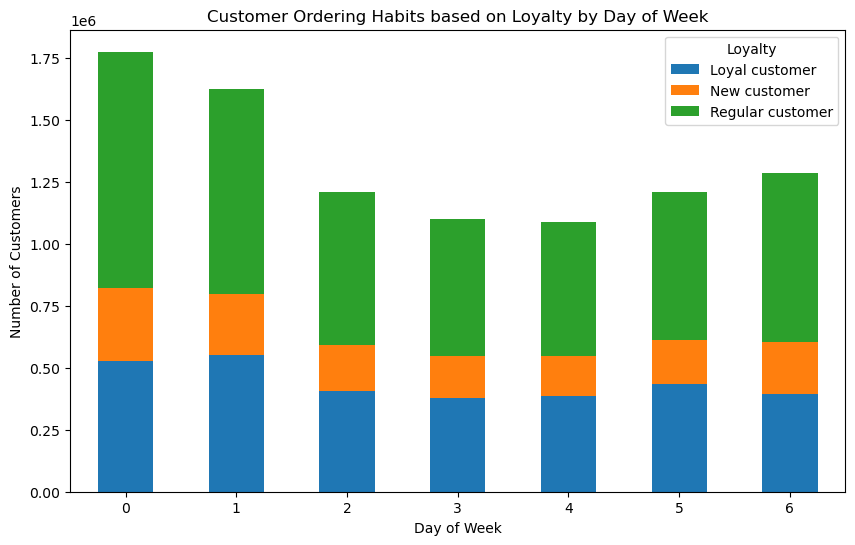

In [103]:
loyal_dow = grouped_loyal.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title('Customer Ordering Habits based on Loyalty by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.legend(title = 'Loyalty')

### Is there a connection between age and family status in terms of ordering habits?

In [7]:
ic_small['age_fam_flag'] = ic_small['age_group'] + ', ' + ic_small['fam_status']

In [8]:
ic_small['age_fam_flag'].value_counts(dropna = False)

age_fam_flag
senior, married                                  2377734
middle aged, married                             2185707
adult, married                                   1414866
senior, divorced/widowed                          792565
middle aged, single                               730240
young adult, married                              541015
adult, single                                     478040
young adult, living with parents and siblings     444889
young adult, single                               321451
Name: count, dtype: int64

In [111]:
grouped_fam = ic_small.groupby(['orders_day_of_week', 'age_fam_flag']).size().unstack(fill_value = 0)

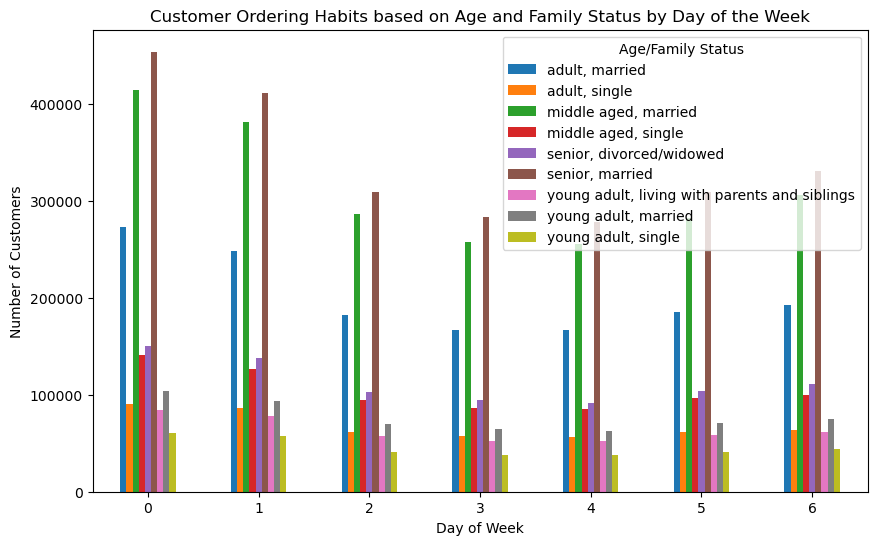

In [112]:
age_fam = grouped_fam.plot(kind = 'bar', figsize = (10, 6))
plt.title('Customer Ordering Habits based on Family Demographic by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.legend(title = 'Family Demographic')

### What spending groups are these age_fam groups in?

In [113]:
grouped_fam_spender = ic_small.groupby(['age_fam_flag', 'spending_flag']).size().unstack(fill_value = 0)

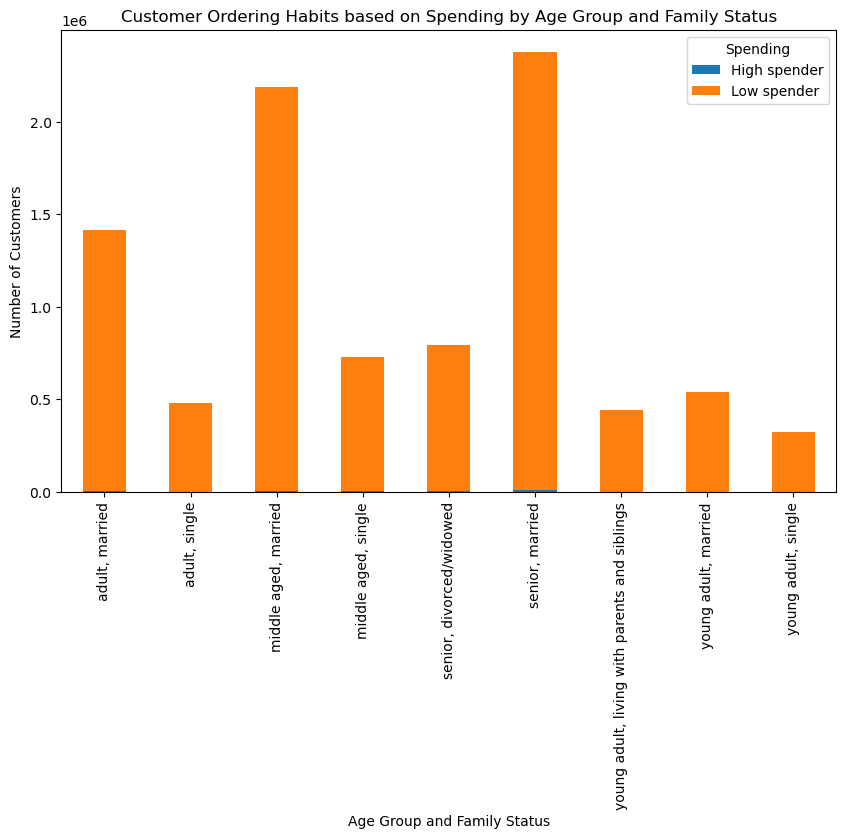

In [115]:
fam_spend = grouped_fam_spender.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title('Customer Ordering Habits based on Spending by Family Demographic')
plt.xlabel('Family Demographic')
plt.ylabel('Number of Customers')
plt.legend(title = 'Spending')

### Frequency flag

In [116]:
grouped_freq = ic_small.groupby(['age_fam_flag', 'frequency_flag']).size().unstack(fill_value = 0)

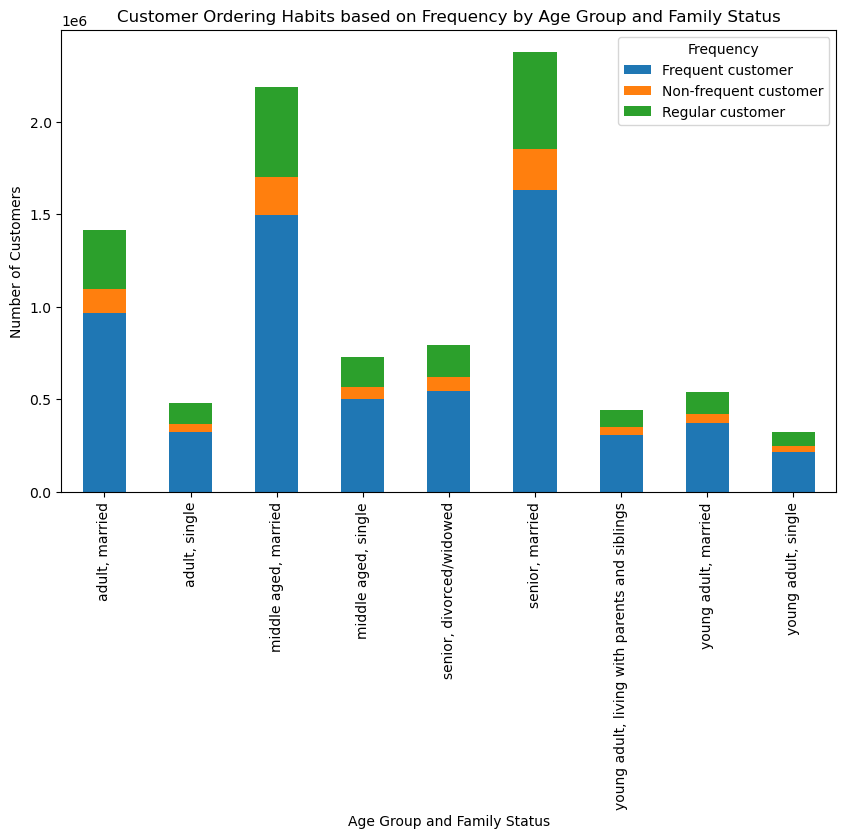

In [118]:
fam_freq = grouped_freq.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title('Customer Ordering Habits based on Frequency by Family Demographic')
plt.xlabel('Family Demographic')
plt.ylabel('Number of Customers')
plt.legend(title = 'Frequency')

### The total revenue per age_fam group

In [40]:
grouped_fam_rev = ic_small.groupby('age_fam_flag')['prices'].sum()

Text(0, 0.5, 'Revenue')

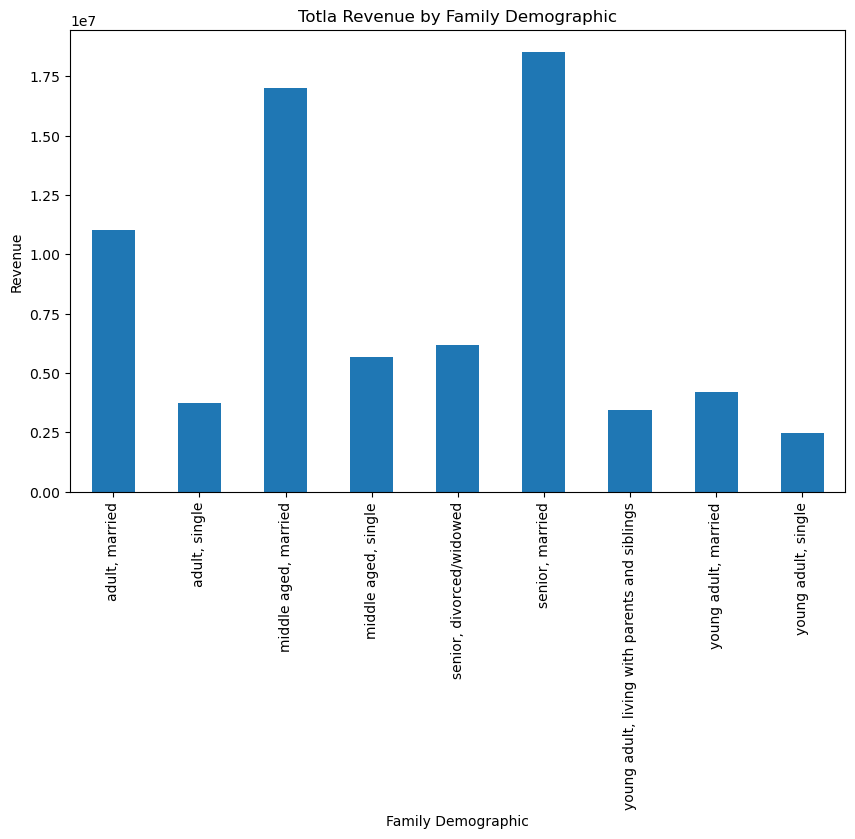

In [41]:
avg_fam_rev = grouped_fam_rev.plot(kind = 'bar', figsize = (10, 6))
plt.title('Total Revenue by Family Demographic')
plt.xlabel('Family Demographic')
plt.ylabel('Revenue')

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [9]:
ic_small.groupby('age_fam_flag')['prices'].agg(['min', 'mean', 'max'])

,min,mean,max
age_fam_flag,,,
"adult, married",1.0,7.785846,25.0
"adult, single",1.0,7.787267,25.0
"middle aged, married",1.0,7.788407,25.0
"middle aged, single",1.0,7.786288,25.0
"senior, divorced/widowed",1.0,7.799713,25.0
"senior, married",1.0,7.795048,25.0
"young adult, living with parents and siblings",1.0,7.787472,25.0
"young adult, married",1.0,7.773414,25.0
"young adult, single",1.0,7.774756,25.0


In [11]:
ic_small.groupby('age_fam_flag')['days_since_prior_order'].agg(['min', 'mean', 'max'])

,min,mean,max
age_fam_flag,,,
"adult, married",0.0,10.804890,30.0
"adult, single",0.0,10.804734,30.0
"middle aged, married",0.0,10.848585,30.0
"middle aged, single",0.0,10.711491,30.0
"senior, divorced/widowed",0.0,10.736639,30.0
"senior, married",0.0,10.810633,30.0
"young adult, living with parents and siblings",0.0,10.756041,30.0
"young adult, married",0.0,10.742320,30.0
"young adult, single",0.0,11.012375,30.0


### Compare your customer profiles with regions and departments.

In [23]:
grouped_region = ic_small.groupby(['region', 'age_fam_flag']).size().unstack(fill_value = 0)

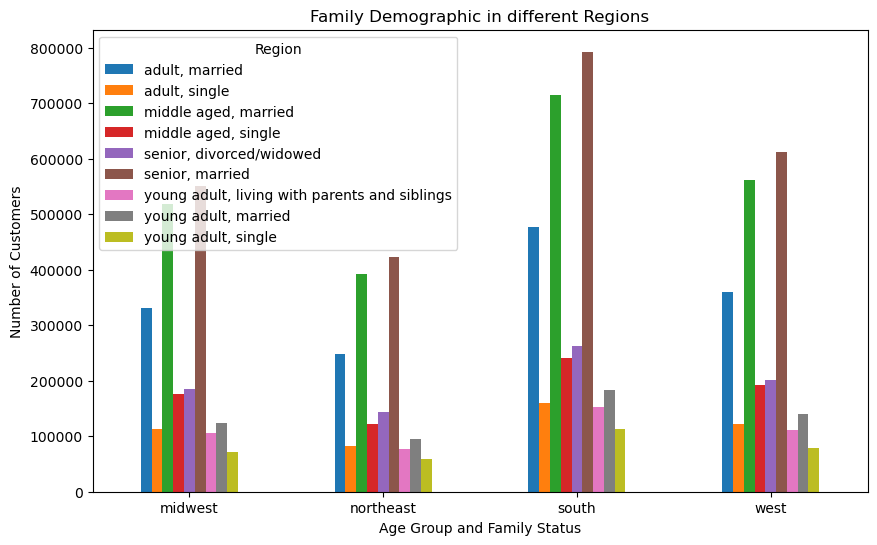

In [26]:
fam_region = grouped_region.plot(kind = 'bar', figsize = (10, 6))
plt.title('Customer Family Demographic in different Regions')
plt.xlabel('Age Group and Family Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.legend(title = 'Family Demographic')

In [27]:
grouped_dep = ic_small.groupby(['department_id', 'age_fam_flag']).size().unstack(fill_value = 0)

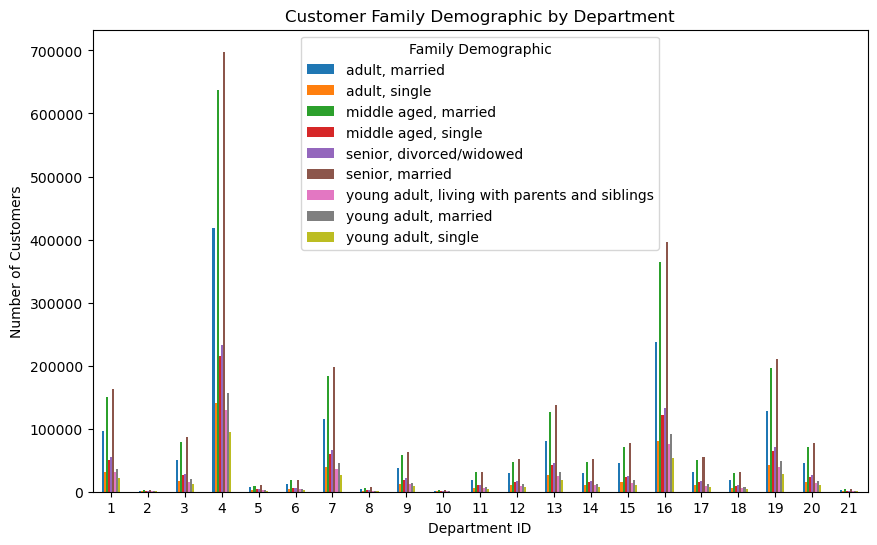

In [28]:
dep_fam = grouped_dep.plot(kind = 'bar', figsize = (10, 6))
plt.title('Customer Family Demographic by Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.legend(title = 'Family Demographic')

In [34]:
grouped_age_dep = ic_small.groupby(['department_id', 'age_fam_flag'])['prices'].sum().unstack()

In [36]:
top_5 = grouped_age_dep.sum(axis = 1).nlargest(5).index

In [37]:
top_5_data = grouped_age_dep.loc[top_5]

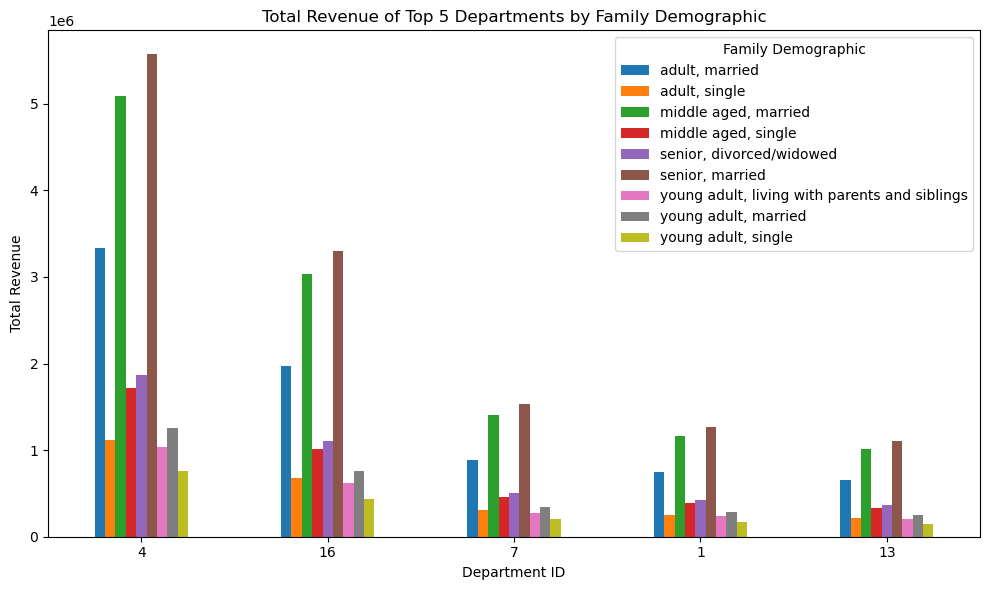

In [38]:
dep_age = top_5_data.plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Department ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of Top 5 Departments by Family Demographic')
plt.legend(title = 'Family Demographic')
plt.xticks(rotation = 0)
plt.tight_layout()

##### departments

In [14]:
dep_sales = ic_small.groupby('department_id')['prices'].sum()

In [16]:
top_5_dep = dep_sales.nlargest(5)

In [17]:
top_5_dep

department_id
4     21731799.0
16    12928627.9
7      5917772.1
1      4926688.4
13     4280340.5
Name: prices, dtype: float64

In [22]:
deps

,Unnamed: 0,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol
5,5,6,international
6,6,7,beverages
7,7,8,pets
8,8,9,dry goods pasta
9,9,10,bulk


In [31]:
ic_small['fam_status'].value_counts(dropna = False)

fam_status
married                             6519322
single                              1529731
divorced/widowed                     792565
living with parents and siblings     444889
Name: count, dtype: int64

In [70]:
ic_small.loc[(ic_small['age_group'] == 'adult') & (ic_small['fam_status'] == 'single'), 'customer_groups'] = 'single adult'
ic_small.loc[(ic_small['age_group'] == 'adult') & (ic_small['fam_status'] == 'divorced/widowed'), 'customer_groups'] = 'single adult'
ic_small.loc[(ic_small['age_group'] == 'middle aged') & (ic_small['fam_status'] == 'single'), 'customer_groups'] = 'single adult'
ic_small.loc[(ic_small['age_group'] == 'middle aged') & (ic_small['fam_status'] == 'divorced/widowed'), 'customer_groups'] = 'single adult'
ic_small.loc[(ic_small['age_group'] == 'young adult') & (ic_small['dependants_flag'] == 'with dependants'), 'customer_groups'] = 'young parent'
ic_small.loc[ic_small['age_group'] == 'senior', 'customer_groups'] = 'elderly person'
ic_small.loc[(ic_small['age_group'] == 'young adult') & (ic_small['fam_status'] == 'single'), 'customer_groups'] = 'single young adult'
ic_small.loc[(ic_small['age_group'] == 'adult') & (ic_small['fam_status'] == 'married'), 'customer_groups'] = 'married adult'
ic_small.loc[(ic_small['age_group'] == 'middle aged') & (ic_small['fam_status'] == 'married'), 'customer_groups'] = 'married adult'

In [73]:
ic_small.loc[(ic_small['age_group'] == 'young adult') & (ic_small['fam_status'] == 'single'), 'customer_groups'] = 'single young adult'

In [74]:
ic_small['customer_groups'].value_counts(dropna = False)

customer_groups
married adult         3600573
elderly person        3170299
single adult          1208280
young parent           985904
single young adult     321451
Name: count, dtype: int64

In [64]:
ic_nan = ic_small[~ic_small['customer_groups'].isin(['young parent', 'single adult', 'elderly person', 'single young adult, no children'])]

In [65]:
ic_nan['gender'].value_counts(dropna = False)

gender
Male      1804527
Female    1796046
Name: count, dtype: int64

In [66]:
ic_nan['fam_status'].value_counts(dropna = False)

fam_status
married    3600573
Name: count, dtype: int64

In [67]:
ic_nan['age_group'].value_counts(dropna = False)

age_group
middle aged    2185707
adult          1414866
Name: count, dtype: int64